In [218]:
#Importamos las librerías necesarias para el análisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


#### Data Analysis

In [102]:
#Leemos la base

data = pd.read_csv("train.csv")

In [103]:
#Observamos los primeros 5 valores

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
#Observamos los ultimos 5 valores 

data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [105]:
#Nombre de las columnas 

data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [106]:
#Cantidad de valores

data.shape[0]

1460

In [107]:
#Cantidad de columnas 
data.shape[1]

81

In [108]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [110]:
#Tipos de datos que estamos trabajando

data.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [111]:
#Columnas categóricas

data.select_dtypes('object').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [112]:
#Columnas cuantitativas 

data.select_dtypes(['int64', 'float64']).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


#### Data Cleaning 

In [113]:
data.isnull().sum().sort_values(ascending = False).head()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [115]:
print("Se encuentran valores perdidos en PoolQc, MiscFeature, Alley y Fence como así también en otras columnas. Procedemos a rellenar esos espacios según su tipo")

Se encuentran valores perdidos en PoolQc, MiscFeature, Alley y Fence como así también en otras columnas. Procedemos a rellenar esos espacios según su tipo


In [116]:
print("Antes, vamos a evaluar que tipo de variable son para saber como vamos a rellenar estos espacios y que no interfieran en nuestros estudios")

Antes, vamos a evaluar que tipo de variable son para saber como vamos a rellenar estos espacios y que no interfieran en nuestros estudios


In [129]:
#Procedemos a limpiar todas nuestros datos 

data['PoolQC'].fillna('',inplace=True)
data['MiscFeature'].fillna('',inplace=True)
data['Alley'].fillna('',inplace=True)
data['Fence'].fillna('',inplace=True)
data['FireplaceQu'].fillna('', inplace = True)
data['LotFrontage'].fillna(0, inplace = True)
data['BsmtExposure'].fillna('' ,inplace = True)
data['BsmtQual'].fillna('', inplace = True)
data['BsmtExposure'].fillna('' ,inplace = True)
data['BsmtQual'].fillna('', inplace = True)
data['BsmtFinType1'].fillna('', inplace = True)
data['BsmtCond'].fillna('', inplace = True)
data['MasVnrType'].fillna('', inplace = True)
data['Electrical'].fillna('', inplace = True)
data['GarageYrBlt'].fillna(0, inplace = True)
data['GarageType'].fillna('', inplace = True)
data['GarageFinish'].fillna('', inplace = True)
data['GarageQual'].fillna('' ,inplace = True)
data['BsmtFinType2'].fillna('' ,inplace = True)
data['GarageCond'].fillna('', inplace = True)
data['MasVnrArea'].fillna('', inplace = True)

In [131]:
data.isnull().sum().sort_values(ascending = False).head()

SalePrice      0
Heating        0
RoofStyle      0
RoofMatl       0
Exterior1st    0
dtype: int64

In [132]:
#Hemos dejado toda nuestra base limpia y lista para guardar ante nuevos estudios en el futuro 

data.to_csv('data_clean.csv')

#### Conociendo en más detalle y con profundidad nuestros datos
#### Estadística descriptiva 

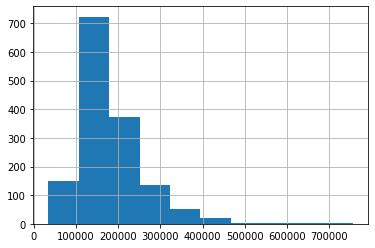

In [133]:
# Estadistica descriptiva a los precios de venta que es nuestra estrella de este análisis 

data['SalePrice'].hist()

Podemos observar como el precio de venta de los inmuebles del dataset se ubican entre los 110.000 dolares y 300.000 dolares. Tenemos una distribución bastante asimétrica

In [134]:
#Observando la media de nuestros datos

data['SalePrice'].mean()

180921.19589041095

In [135]:
#Observando nuestra desviación standart de ventas 

data['SalePrice'].std()

79442.50288288662

In [136]:
#Observando el valor máximo

data['SalePrice'].max()

755000

In [138]:
#Averiguando la casa más costosa de nuestro dataset 

data[data['SalePrice'] == 755000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,,IR1,Lvl,AllPub,...,0,,,,0,1,2007,WD,Normal,755000


Fue vendida en 2007, con un area de 21.535 feet 2. Corresponde al id 692 y tiene un LotFrontage de 104.0

In [139]:
#Observando el valor mínimo 
data['SalePrice'].min()

34900

In [140]:
data[data['SalePrice'] == 34900]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,,Reg,Lvl,AllPub,...,0,,GdWo,,0,11,2009,WD,Abnorml,34900


Fue vendida en Noviembre 2009, con un area de 7879 feet2. No tiene piscina, en condiciones anormales, zona C subclase 30

Analizando los años en cuanto a las ventas

In [147]:
data.groupby('YrSold')['Id'].count()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: Id, dtype: int64

1. 2009 fue el año de mayor venta de inmuebles
2. 2010 fue el año que registra una impactante caída en la venta de inmuebles

In [150]:
data.groupby('YrSold')['SalePrice'].sum()

YrSold
2006    57320530
2007    61214777
2008    53917695
2009    60648051
2010    31043893
Name: SalePrice, dtype: int64

1. 2007 fue el año que más se recaudo en ventas con 61 millones de dólares a pesar de no ser el año de más ventas
2. 2010 sigue representando un año de mucha pérdida con una venta de 31 millones de dólares

In [151]:
#Conociendo los meses de venta más 

data.groupby('MoSold')['Id'].count()

MoSold
1      58
2      52
3     106
4     141
5     204
6     253
7     234
8     122
9      63
10     89
11     79
12     59
Name: Id, dtype: int64

1. A partir de marzo las ventas comienzan a creer. 
2. Los meses de Mayo, Junio, Julio son los que más ventas realizan 
3. En la temporada de invierno en EEUU, es donde menos ventas registran 
4. En la temporada de verano en EEUU, en donde mas ventas registran

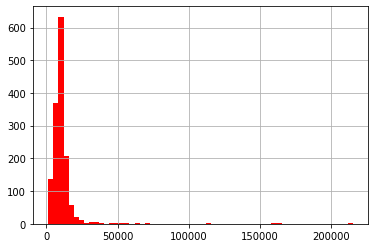

In [158]:
#Conociendo las longitudes de los frentes de las casas
#Tambien vamos a conocer las dimensiones de las casas 

data['LotArea'].hist(color = "red", bins = 60)

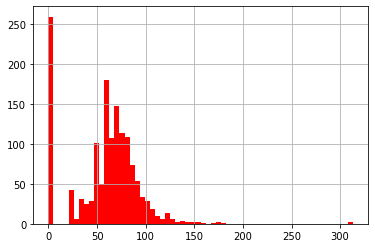

In [161]:
data['LotFrontage'].hist(bins = 60, color = "red")

#### Correlación

In [162]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.019761,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.019761,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.076670,-0.009312,...,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,0.209624
LotArea,-0.033226,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,-0.009312,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


Las tres correlaciones mas importantes de Sales son las columnas de OverallQuad, Year Built y YearRemodAdd que corresponden a las valores de Calidad de construcción, año de construcción y año de remodelación.

In [168]:
#Investigando la columna OverallQual

data.groupby('OverallQual')['Id'].count()

OverallQual
1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: Id, dtype: int64

In [171]:
#Como podemos observar, es uno de los grandes factores la calidad de construcción en el precio de la misma 

data[(data['OverallQual'] == 10) & (data['SalePrice'] >= 450000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,,IR2,Lvl,AllPub,...,0,,GdPrv,,0,6,2006,WD,Normal,475000
440,441,20,RL,105.0,15431,Pave,,Reg,Lvl,AllPub,...,0,,,,0,4,2009,WD,Normal,555000
591,592,60,RL,97.0,13478,Pave,,IR1,Lvl,AllPub,...,0,,,,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,,IR1,Lvl,AllPub,...,0,,,,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,,IR1,Lvl,AllPub,...,0,,,,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,,IR1,Lvl,AllPub,...,555,Ex,MnPrv,,0,7,2007,WD,Abnorml,745000
1243,1244,20,RL,107.0,13891,Pave,,Reg,Lvl,AllPub,...,0,,,,0,9,2006,New,Partial,465000
1373,1374,20,RL,0.0,11400,Pave,,Reg,Lvl,AllPub,...,0,,,,0,3,2007,WD,Normal,466500


In [175]:
data.groupby('YearBuilt')['Id'].count().sort_values(ascending = False).head()

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
Name: Id, dtype: int64

In [178]:
data.groupby('YearRemodAdd')['Id'].count().sort_values(ascending = False).head()

YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
Name: Id, dtype: int64

### Prueba de hipótesis

#### H1 = El año de la venta de una casa influye en el precio
#### H0 = Los años de la venta de un inmueble no influyen en el precio 

In [196]:
from scipy.stats import ttest_rel

ttest_rel(data['SalePrice'],data['YrSold'])

Ttest_relResult(statistic=86.05302075927072, pvalue=0.0)

Tenemos una p-value por debajo del 0,05 por lo que rechazamos la hipotesis nula. Los años de una casa si influyen en el precio de una casa 

Dado que una prueba de pares coincidentes es equivalente a una prueba de la diferencia de una muestra, también podemos realizar una prueba de una muestra y obtener exactamente el mismo resultado.

In [197]:
#### H1 = El año de la venta de una casa influye en el precio
#### H0 = Los años de la venta de un inmueble no influyen en el precio 
from scipy.stats import ttest_1samp
ttest_1samp(data['SalePrice']-data['YrSold'], 0)


Ttest_1sampResult(statistic=86.05302075927072, pvalue=0.0)

In [200]:
year_2017 = data[data['YrSold'] == 2007]

In [209]:
#Otra prueba de hipotesis 

#h1 = La media del precio de ventas en 2017 fue de 100.000 dolares
#h0 = La media del precio de ventas en 2017 no fue de 100.000 dolares


ttest_1samp(year_2017['SalePrice'], 100000)

Ttest_1sampResult(statistic=18.20073999572976, pvalue=1.172406259648605e-51)

Se rechaza la hipótesis al ser un resultado menor a 0.05

In [211]:
#Otra prueba de hipotesis 

#h1 = La media del precio de ventas en 2017 fue de 170.000 dolares
#h0 = La media del precio de ventas en 2017 no fue de 170.000 dolares


ttest_1samp(year_2017['SalePrice'], 180000)

Ttest_1sampResult(statistic=1.2822427500121882, pvalue=0.20066300531121836)

Se acepta la hipótesis de que la media en el precio de ventas en 2017 fue de 180.000 dólares

In [212]:
#De hecho, para comprobarlo, imprimimos la media

year_2017['SalePrice'].mean()

186063.1519756839

In [216]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Regresión lineal

In [217]:
X = sm.add_constant(data[['OverallQual', 'YearBuilt', 'YearRemodAdd']]) # adding a constant
Y = data['SalePrice']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     848.3
Date:                Sun, 04 Aug 2019   Prob (F-statistic):          6.18e-319
Time:                        17:58:17   Log-Likelihood:                -17806.
No. Observations:                1460   AIC:                         3.562e+04
Df Residuals:                    1456   BIC:                         3.564e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.01e+06   1.47e+05     -6.853   

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Tenemos un RSquared del 63%, mientras mas alto sea el el valor de R, mejor será nuestro resultado de regresión.
Nuestro valor F está por debajo del 0,05% por lo que rechazamos nuestra hipótesis nula. Pueden estar relacionadas entre sí estos valores. 



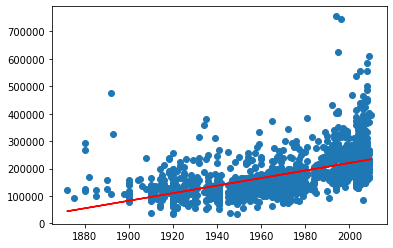

In [221]:
X = data['YearBuilt'].values.reshape(-1, 1)  # convierto la variable en numpy's
Y = data['SalePrice'].values.reshape(-1, 1) # dimensiones correctas
linear_regressor = LinearRegression()  # crear 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

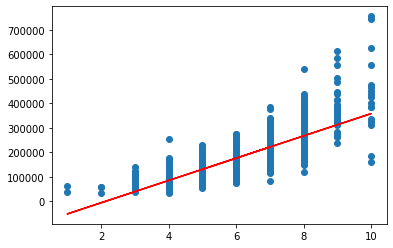

In [222]:
X = data['OverallQual'].values.reshape(-1, 1)  # convierto la variable en numpy's
Y = data['SalePrice'].values.reshape(-1, 1) # dimensiones correctas
linear_regressor = LinearRegression()  # crear 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

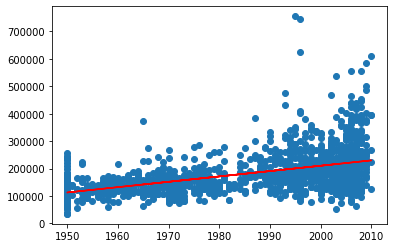

In [237]:
X = data['YearRemodAdd'].values.reshape(-1, 1)  # convierto la variable en numpy's
Y = data['SalePrice'].values.reshape(-1, 1) # dimensiones correctas
linear_regressor = LinearRegression()  # crear 
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()